Unfortunately there is some error in chopping that leads to mixup... Let's try to fix it based on file save time.

In [20]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
all_files = glob('data/mix/*.png')

In [6]:
times = [os.path.getmtime(f) for f in all_files]

In [66]:
df = pd.DataFrame([all_files, times], index=['path', 'time']).T
df.sort_values('time', inplace=True)
df['cell'] = df['path'].apply(lambda s: s[9:11])
df['name'] = df['path'].apply(lambda s: s[9:])

In [67]:
df

,path,time,cell,name
593,data/mix/a1_9843ae286bda4c72a3f2d8fb6e8b2160.png,1641044599.568019,a1,a1_9843ae286bda4c72a3f2d8fb6e8b2160.png
2308,data/mix/b1_ec402467267e4928b9a14a7d311d5249.png,1641044599.573037,b1,b1_ec402467267e4928b9a14a7d311d5249.png
2029,data/mix/c1_bff9d6fae59d4c3e808af09fa7dd24fb.png,1641044599.577969,c1,c1_bff9d6fae59d4c3e808af09fa7dd24fb.png
473,data/mix/d1_a6ba3ba1b5904173a61e11361d7d8afb.png,1641044599.582553,d1,d1_a6ba3ba1b5904173a61e11361d7d8afb.png
2393,data/mix/e1_679e36a2bce3449ca13c24d214d7486f.png,1641044599.586691,e1,e1_679e36a2bce3449ca13c24d214d7486f.png
...,...,...,...,...
2226,data/mix/d8_1d2e89695c8447bd9700b4aa3a2cd44e.png,1641123999.470963,d8,d8_1d2e89695c8447bd9700b4aa3a2cd44e.png
1249,data/mix/e8_2fcea110fcb34a75bc57846c1e35ef9f.png,1641123999.488702,e8,e8_2fcea110fcb34a75bc57846c1e35ef9f.png
249,data/mix/f8_7ddec1f32cf14b41ba0587c174cea2db.png,1641123999.49208,f8,f8_7ddec1f32cf14b41ba0587c174cea2db.png
2272,data/mix/g8_caf346b9406040e4a09f642398e0afef.png,1641123999.495719,g8,g8_caf346b9406040e4a09f642398e0afef.png


In [68]:
df.shape[0] / 64

46.0

First 6 boards are on starting positions.

Filled


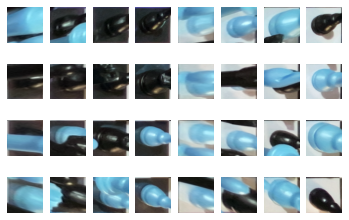

empty


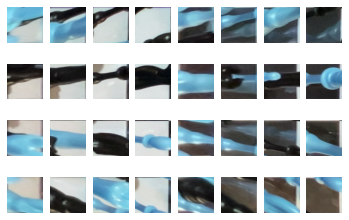

In [217]:
# 1. 1278
# fields = {f'{col}{row}': row in [1, 2, 7, 8] for row in range(1, 9) for col in 'abcdefgh'}
# 2. Black - 6 - 10
# all_fields = [f'{col}{row}' for row in range(1, 9) for col in 'abcdefgh']
# target =   [f'{col}{row}' for row in [1, 3, 5, 7] for col in 'aceg'] \
#          + [f'{col}{row}' for row in [2, 4, 6, 8] for col in 'bdfh']
# fields = {f: f in target for f in all_fields}
# 3. White - 11 - 
# fields = {f: f not in target for f in all_fields}
# 4. 3456
# fields = {f'{col}{row}': row in [3, 4, 5, 6] for row in range(1, 9) for col in 'abcdefgh'}
# 5. abgh
# fields = {f'{col}{row}': col in 'abgh' for row in range(1, 9) for col in 'abcdefgh'}
# 6.
# fields = {f'{col}{row}': col in 'cdef' for row in range(1, 9) for col in 'abcdefgh'}
# 7.
# fields = {f'{col}{row}': row in [1, 8, 4, 5] for row in range(1, 9) for col in 'abcdefgh'}
# 8.
# fields = {f'{col}{row}': row in [1, 3, 5, 7] for row in range(1, 9) for col in 'abcdefgh'}
# 9.
fields = {f'{col}{row}': row in [2, 4, 6, 8] for row in range(1, 9) for col in 'abcdefgh'}

n = 45
game = df[64*n:64*(n+1)].copy()

filled = game[game['fixed_cell'].apply(lambda c: c in [k for k, v in fields.items() if v])]
empty = game[game['fixed_cell'].apply(lambda c: c not in [k for k, v in fields.items() if v])]

# for i, path in enumerate(game['path']):
#     plt.subplot(8, 8, 64 - i)
#     im = np.array(Image.open(path))
#     plt.imshow(im)
#     plt.axis('off')
# plt.show()

print('Filled')
for i, path in enumerate(filled['path']):
    plt.subplot(4, 8, 32 - i)
    im = np.array(Image.open(path))
    plt.imshow(im)
    plt.axis('off')
plt.show()

print('empty')
for i, path in enumerate(empty['path']):
    plt.subplot(4, 8, 32 - i)
    im = np.array(Image.open(path))
    plt.imshow(im)
    plt.axis('off')
plt.show()

# assert np.all(filled['name'].apply(lambda p: p in [path[12:] for path in glob('data/filled/*.png')]))
# assert np.all(empty['name'].apply(lambda p: p in [path[11:] for path in glob('data/empty/*.png')]))

- 8, 9, 10 - looks like blacks are mixed up with whites

Hypothesis: we have a mirror board and thus a1 <-> h1, ...

# quick fix - TODO

In [210]:
df['fixed_cell'] = df['cell'].apply(lambda c: {'1': 'a', '2': 'b', '3': 'c', '4': 'd',
                                               '5': 'e', '6': 'f', '7': 'g', '8': 'h'}[c[1]] + 
                                              {'a': '8', 'b': '7', 'c': '6', 'd': '5',
                                               'e': '4', 'f': '3', 'g': '2', 'h': '1'}[c[0]])

In [218]:
# 1. 1278
# fields = {f'{col}{row}': row in [1, 2, 7, 8] for row in range(1, 9) for col in 'abcdefgh'}
# 2. Black - 6 - 10
# all_fields = [f'{col}{row}' for row in range(1, 9) for col in 'abcdefgh']
# target =   [f'{col}{row}' for row in [1, 3, 5, 7] for col in 'aceg'] \
#          + [f'{col}{row}' for row in [2, 4, 6, 8] for col in 'bdfh']
# fields = {f: f in target for f in all_fields}
# 3. White - 11 - 15
# fields = {f: f not in target for f in all_fields}
# 4. 3456
# fields = {f'{col}{row}': row in [3, 4, 5, 6] for row in range(1, 9) for col in 'abcdefgh'}
# 5. abgh
# fields = {f'{col}{row}': col in 'abgh' for row in range(1, 9) for col in 'abcdefgh'}
# 6.
# fields = {f'{col}{row}': col in 'cdef' for row in range(1, 9) for col in 'abcdefgh'}
# 7.
# fields = {f'{col}{row}': row in [1, 8, 4, 5] for row in range(1, 9) for col in 'abcdefgh'}
# 8.
# fields = {f'{col}{row}': row in [1, 3, 5, 7] for row in range(1, 9) for col in 'abcdefgh'}
# 9.
# fields = {f'{col}{row}': row in [2, 4, 6, 8] for row in range(1, 9) for col in 'abcdefgh'}

for n in range(41, 46):
    game = df[64*n:64*(n+1)].copy()

    filled = game[game['fixed_cell'].apply(lambda c: c in [k for k, v in fields.items() if v])]
    empty = game[game['fixed_cell'].apply(lambda c: c not in [k for k, v in fields.items() if v])]

    for path in filled['path']:
        os.rename(path, path.replace('/mix/', '/filled/'))

    for path in empty['path']:
        os.rename(path, path.replace('/mix/', '/empty/'))

# Bug fix

We have two moving parts - adjust perspective and chop. First I have adjusted the target coordinates in adjust_perspective.

Let's test it out by putting a figure on G3.

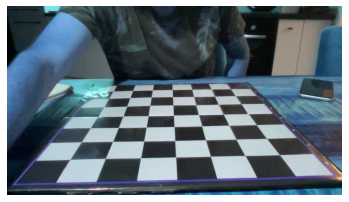

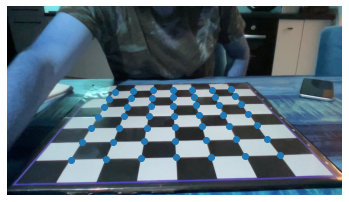

In [31]:
empty = capture()
corners = detect_checkerboard(empty)

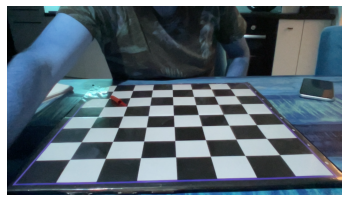

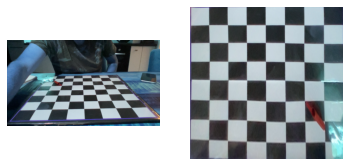

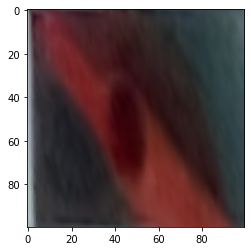

In [32]:
plt.imshow(capture_pipeline(corners)['g3'])